<a href="https://colab.research.google.com/github/Saicharan39/Machine-Learning/blob/main/soil_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow
!pip install keras

In [3]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,MaxPool2D,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img_width,img_height=150,150
batch_size=32
epochs=10

In [5]:
path='/content/drive/MyDrive/Soil_Dataset'




In [6]:
train_data_dir='/content/drive/MyDrive/Soil_Dataset/Train'
test_data_dir='/content/drive/MyDrive/Soil_Dataset/Test'

In train data there are 4 subfolders

In [7]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')


The number of files in the directory is: 4


In [8]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/Alluvial_Soil/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')

The number of files in the directory is: 175


In [9]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/Clay_Soil/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')


The number of files in the directory is: 144


In [10]:

from glob import glob

glob('/content/drive/MyDrive/Soil_Dataset/Train/*')



['/content/drive/MyDrive/Soil_Dataset/Train/Black_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Alluvial_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Clay_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Red_Soil']

In [11]:
labels=['Alluvial_Soil','Black_Soil','Clay_Soil','Red_Soil']

In [12]:
def show_soil(path):
 im=cv2.imread(path)
 im_resized=cv2.resize(im,(img_height,img_width),interpolation=cv2.INTER_LINEAR)
 plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
 plt.show()

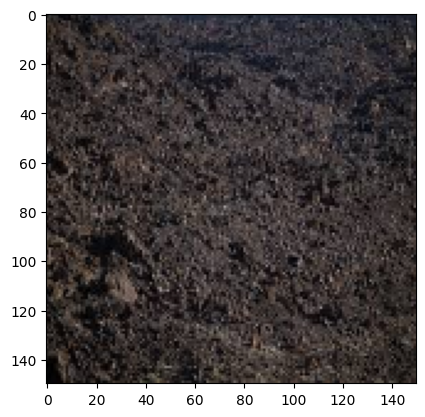

In [13]:
show_soil('/content/drive/MyDrive/Soil_Dataset/Train/Black_Soil/Black_10.jpg')

In [14]:
trainGen=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
testGen=ImageDataGenerator(rescale=1./255)


In [15]:
train=trainGen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size,shuffle=True)
test=testGen.flow_from_directory(test_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size)


Found 715 images belonging to 4 classes.
Found 188 images belonging to 4 classes.


Building a convolutional layer

In [16]:
model=Sequential()
model.add(Conv2D(128,(3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,3,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(32,3,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 activation (Activation)     (None, 150, 150, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=15

In [20]:
model.fit(train,epochs=epochs,validation_data=test)

Epoch 1/10
23/23 [==============================] - 58s 3s/step - loss: 0.9800 - accuracy: 0.5888 - val_loss: 1.1251 - val_accuracy: 0.5585
Epoch 2/10
23/23 [==============================] - 60s 3s/step - loss: 0.6355 - accuracy: 0.7524 - val_loss: 0.5600 - val_accuracy: 0.7500
Epoch 3/10
23/23 [==============================] - 59s 3s/step - loss: 0.4333 - accuracy: 0.8350 - val_loss: 0.4712 - val_accuracy: 0.7819
Epoch 4/10
23/23 [==============================] - 59s 3s/step - loss: 0.3459 - accuracy: 0.8517 - val_loss: 0.7119 - val_accuracy: 0.7872
Epoch 5/10
23/23 [==============================] - 62s 3s/step - loss: 0.4198 - accuracy: 0.8182 - val_loss: 0.7061 - val_accuracy: 0.7181
Epoch 6/10
23/23 [==============================] - 58s 3s/step - loss: 0.3680 - accuracy: 0.8573 - val_loss: 0.5446 - val_accuracy: 0.8245
Epoch 7/10
23/23 [==============================] - 60s 3s/step - loss: 0.3315 - accuracy: 0.8615 - val_loss: 0.4410 - val_accuracy: 0.7872
Epoch 8/10
23/23 [==

In [21]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
train_loss=model.history.history['loss']
train_loss

[0.9799779653549194,
 0.6355133652687073,
 0.4332655966281891,
 0.34593385457992554,
 0.4197651445865631,
 0.368039608001709,
 0.33146488666534424,
 0.26579198241233826,
 0.29892683029174805,
 0.26001569628715515]

In [23]:
train_acc=model.history.history['accuracy']
train_acc

[0.5888111591339111,
 0.7524475455284119,
 0.8349650502204895,
 0.8517482280731201,
 0.8181818127632141,
 0.8573426604270935,
 0.8615384697914124,
 0.881118893623352,
 0.8727272748947144,
 0.8937063217163086]

In [24]:
test_loss=model.history.history['val_loss']
test_loss

[1.1250842809677124,
 0.559971809387207,
 0.4712386429309845,
 0.7119091749191284,
 0.706138551235199,
 0.5445883870124817,
 0.4409649074077606,
 0.4572933316230774,
 0.3769263029098511,
 0.40308836102485657]

In [25]:
test_acc=model.history.history['val_accuracy']
test_acc

[0.5585106611251831,
 0.75,
 0.7819148898124695,
 0.7872340679168701,
 0.7180851101875305,
 0.8244680762290955,
 0.7872340679168701,
 0.7872340679168701,
 0.8617021441459656,
 0.8297872543334961]

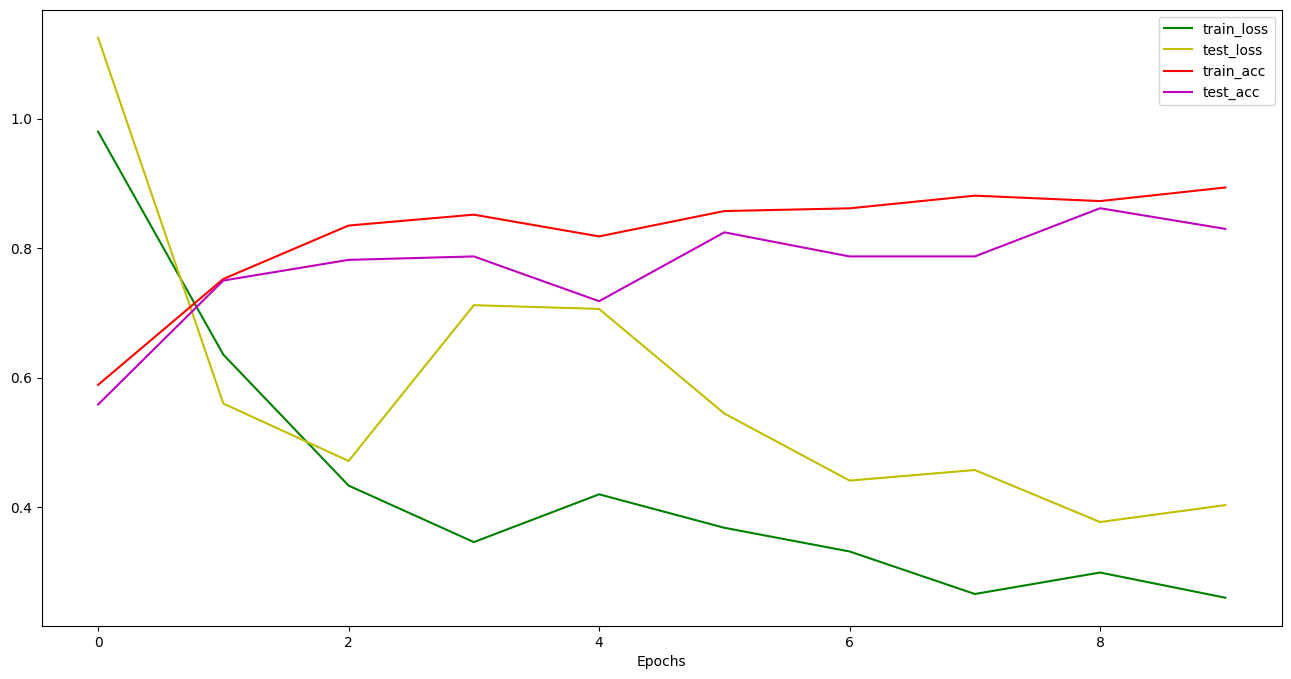

In [28]:
import numpy as np
plt.figure(figsize=(16,8))
plt.plot(np.arange(epochs),train_loss,color='g',label='train_loss')
plt.plot(np.arange(epochs),test_loss,color='y',label='test_loss')
plt.plot(np.arange(epochs),train_acc,color='r',label='train_acc')
plt.plot(np.arange(epochs),test_acc,color='m',label='test_acc')
plt.legend()
plt.xlabel('Epochs')
plt.show()


In [ ]:
loss,acc=model.evaluate(test)
print('Test Loss:',loss)
print('Test Acc:',acc)


6/6 [==============================] - 5s 775ms/step - loss: 0.1918 - accuracy: 0.9255
Test Loss: 0.19178010523319244
Test Acc: 0.9255319237709045


Prediction System


In [ ]:
def predict_soil(path):
  im=cv2.imread(path)
  im_resized=cv2.resize(im,(img_height,img_width),interpolation=cv2.INTER_LINEAR)
  plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
  plt.show()

  img_pred=image.load_img(path,target_size=(img_height,img_width))
  img_pred=image.img_to_array(img_pred)
  img=np.expand_dims(img_pred,axis=0)
  result=model.predict_classes(img)
  prob=model.predict_proba(img)
  print('Predicted class:',result)
  print('Probability:{}'.format(prob[0]))
  if result[0]==0:
    prediction='Alluvial_Soil'
  elif result[0]==1:
    prediction='Black_Soil'
  if result[0]==2:
    prediction='clay_Soil'
  else:
    prediction='Red_Soil'

  print('Predicted Class:',prediction)



In [ ]:
from keras.preprocessing import image


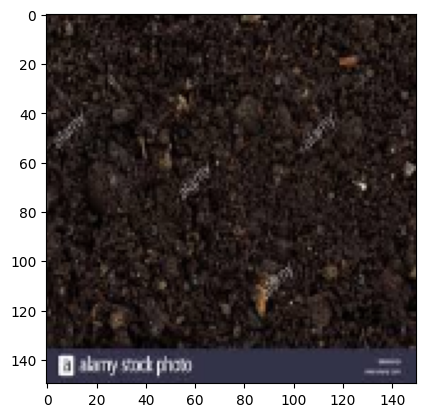

AttributeError: ignored

In [ ]:
predict_soil('/content/drive/MyDrive/Soil_Dataset/Test/Black_Soil/Black_12.jpg')

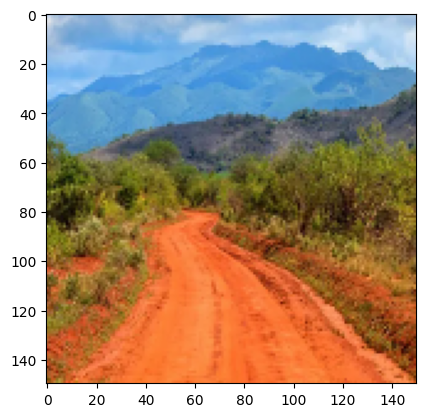

1/1 [==============================] - 0s 38ms/step
Predicted class: [[1. 0. 0. 0.]]
Probability: 1.0
Predicted Class: Alluvial_Soil


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define img_height and img_width
img_height = 150
img_width = 150

def predict_soil(path):
    im = cv2.imread(path)
    im_resized = cv2.resize(im, (img_height, img_width), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()

    img_pred = image.load_img(path, target_size=(img_height, img_width))
    img_pred = image.img_to_array(img_pred)
    img = np.expand_dims(img_pred, axis=0)
    result = model.predict(img)

    # Get the predicted class index
    predicted_class_index = np.argmax(result)

    # Define the class labels based on your model
    class_labels = ['Alluvial_Soil', 'Black_Soil', 'Clay_Soil', 'Red_Soil']

    # Get the predicted class label
    prediction = class_labels[predicted_class_index]

    print('Predicted class:', result)
    print('Probability: {}'.format(result[0, predicted_class_index]))

    # Use if-else statements to assign class names
    if predicted_class_index == 0:
        prediction = 'Alluvial_Soil'
    elif predicted_class_index == 1:
        prediction = 'Black_Soil'
    elif predicted_class_index == 2:
        prediction = 'Clay_Soil'
    else:
        prediction = 'Red_Soil'

    print('Predicted Class:', prediction)

# Example usage
path_to_image = '/content/red_soil.jpg'
predict_soil(path_to_image)

